In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv("train (6).csv")

In [37]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning (Missing Values)

In [38]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [39]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [42]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [43]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [44]:
print(titanic_data['Embarked'].mode()[0])

S


In [45]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [46]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

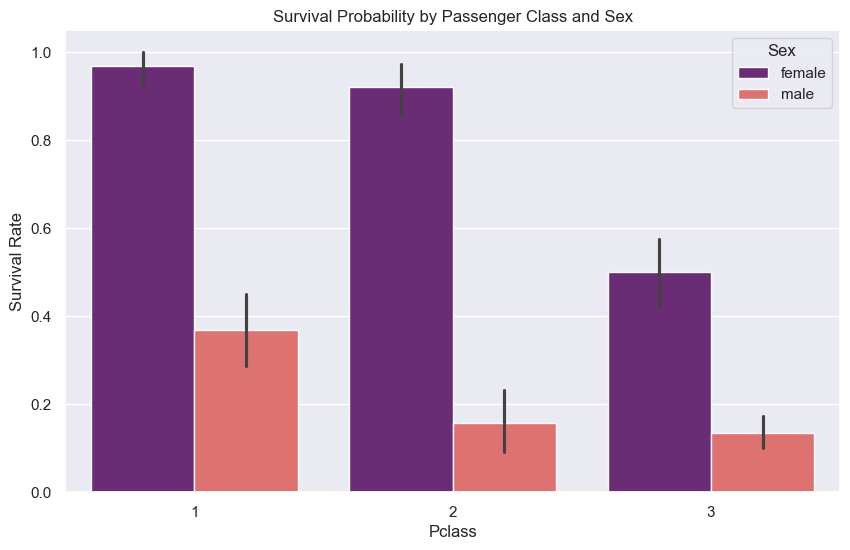

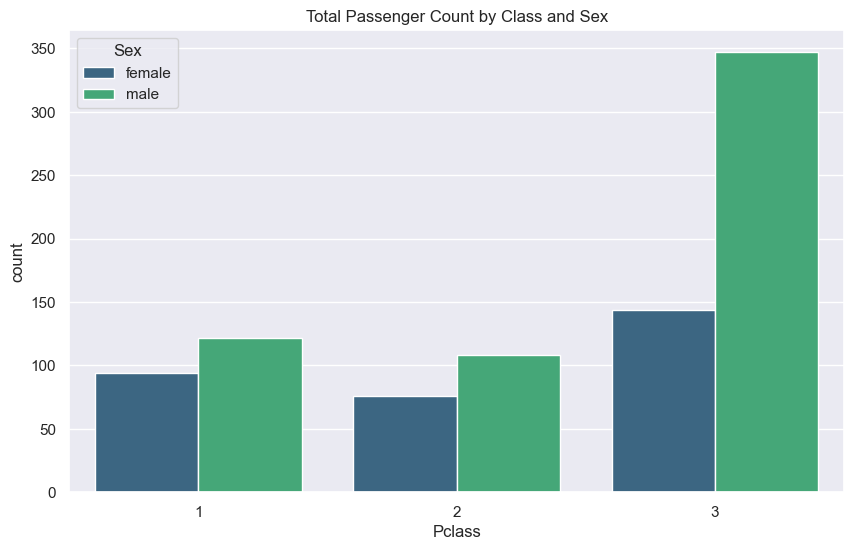

Survival Percentage (Data View):
Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Survival Probability by Class and Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data, palette='magma')
plt.title('Survival Probability by Passenger Class and Sex')
plt.ylabel('Survival Rate')
plt.show()

# 2. Passenger Count by Class and Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=titanic_data, palette='viridis')
plt.title('Total Passenger Count by Class and Sex')
plt.show()

# 3. Exact Survival Percentage Table
survival_stats = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Survival Percentage (Data View):")
print(survival_stats)

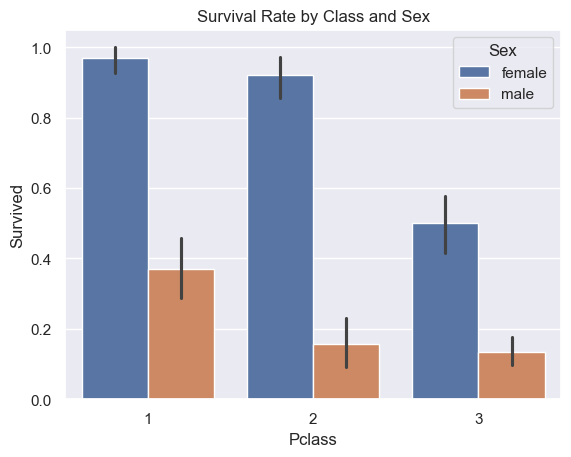

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Proves the Women and Children First rule in your data
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data)
plt.title("Survival Rate by Class and Sex")
plt.show()

In [51]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

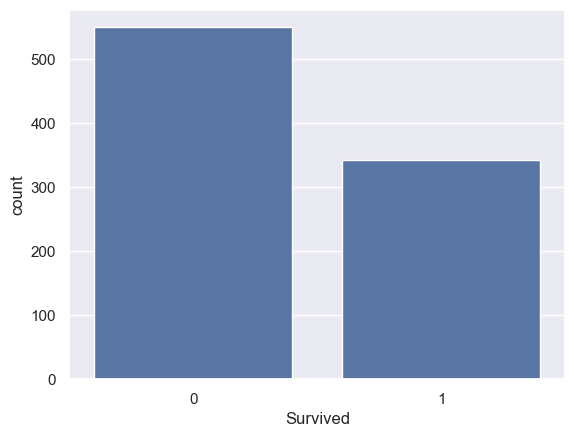

In [52]:
# making a count plot for "Survived" column
sns.countplot(x ='Survived', data=titanic_data)

In [53]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

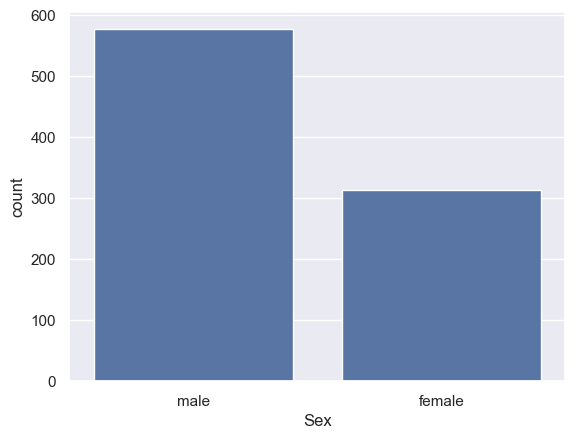

In [54]:
# making a count plot for "Sex" column
sns.countplot(x = 'Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

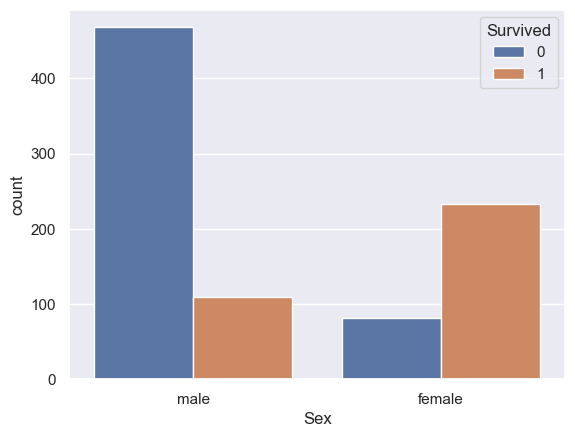

In [55]:
# number of survivors Gender wise
sns.countplot(x ='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

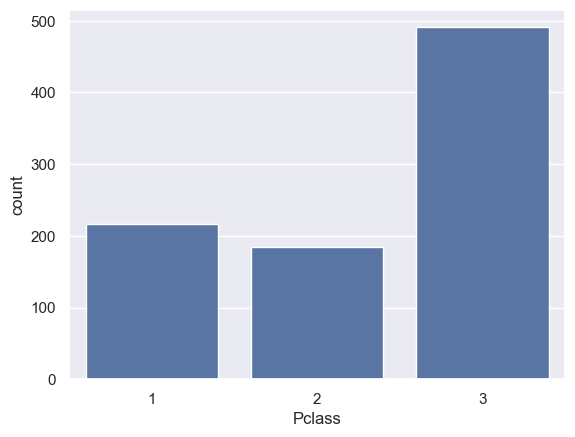

In [56]:
# making a count plot for "Pclass" column
sns.countplot(x = 'Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

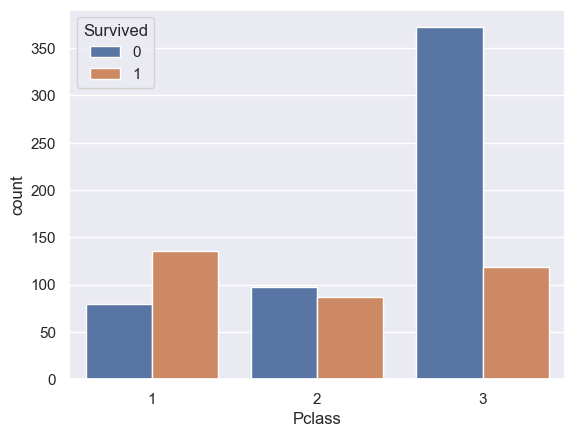

In [57]:
sns.countplot(x = 'Pclass', hue='Survived', data=titanic_data)

In [58]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [59]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [60]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

C:\Users\SHIWANSHU\AppData\Local\Temp\ipykernel_13556\807954839.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [61]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [62]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
C:\Users\SHIWANSHU\AppData\Local\Temp\ipykernel_13556\437929526.py:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [63]:
titanic_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [64]:
df = pd.get_dummies(titanic_data, drop_first=True)

In [65]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(891, 24) (712, 24) (179, 24)


Professional Pipeline and Scaling

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Pipeline steps ke naam unique hona chahiye
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Training
pipeline.fit(X_train, Y_train) 

print("Pipeline successfully trained!")
print(f"Test Accuracy: {pipeline.score(X_test, Y_test):.2f}")

Pipeline successfully trained!
Test Accuracy: 0.79


Confusion Matrix (Model Diagnostics)

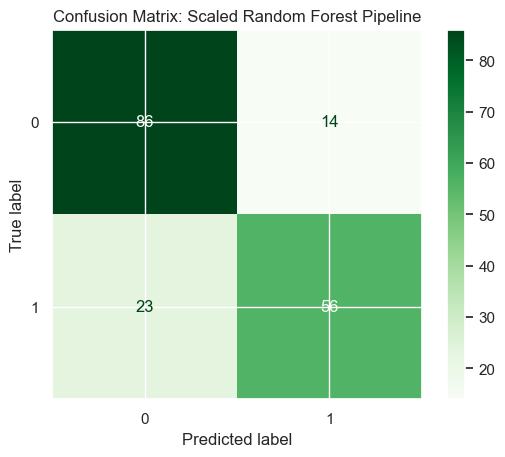

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pipeline ke through hi confusion matrix display karna
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, Y_test, cmap='Greens')
plt.title('Confusion Matrix: Scaled Random Forest Pipeline')
plt.show()

In [70]:
# import joblib
# joblib.dump(pipeline, "titanic_model.pkl") 
import joblib

joblib.dump(pipeline, "titanic_model.pkl")
joblib.dump(X.columns, "feature_columns.pkl")



['feature_columns.pkl']